In [1]:
import pandas as pd

# load locally stored dataset with song features
df = pd.read_csv(filepath_or_buffer='data.csv', sep=',', index_col=0)

/var/folders/j8/6g668vcj4tg5h1dhl577p6yw0000gn/T/ipykernel_12929/1633539993.py:4: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath_or_buffer='data.csv', sep=',', index_col=0)


In [2]:
df.isnull().sum()

id                        1
name                  12845
artist              5517160
album               7793838
acousticness              1
danceability              1
energy                    1
instrumentalness          1
loudness                  1
speechiness               1
tempo                     1
valence                   1
release_year        5787318
dtype: int64

In [3]:
df.drop(df.loc[df['id'].isnull()].index, inplace=True)

In [4]:
df.isnull().sum()

id                        0
name                  12844
artist              5517159
album               7793837
acousticness              0
danceability              0
energy                    0
instrumentalness          0
loudness                  0
speechiness               0
tempo                     0
valence                   0
release_year        5787317
dtype: int64

In [5]:
bins = range(int(df['release_year'].min()) // 10 * 10, int(df['release_year'].max()) // 10 * 10 + 20, 10)
df_years = pd.cut(df['release_year'], bins=bins, right=False)

df_bins = df_years.value_counts()
df_bins[df_bins != 0].sort_index(ascending=False)

release_year
[2020, 2030)    356068
[2010, 2020)    793003
[2000, 2010)    560200
[1990, 2000)    123537
[1980, 1990)     85637
[1970, 1980)     63391
[1960, 1970)     47765
[1950, 1960)     35413
[1940, 1950)     18047
[1930, 1940)     13043
[1920, 1930)      7610
[1910, 1920)         3
[1900, 1910)        29
[1890, 1900)         2
[1510, 1520)         1
Name: count, dtype: int64

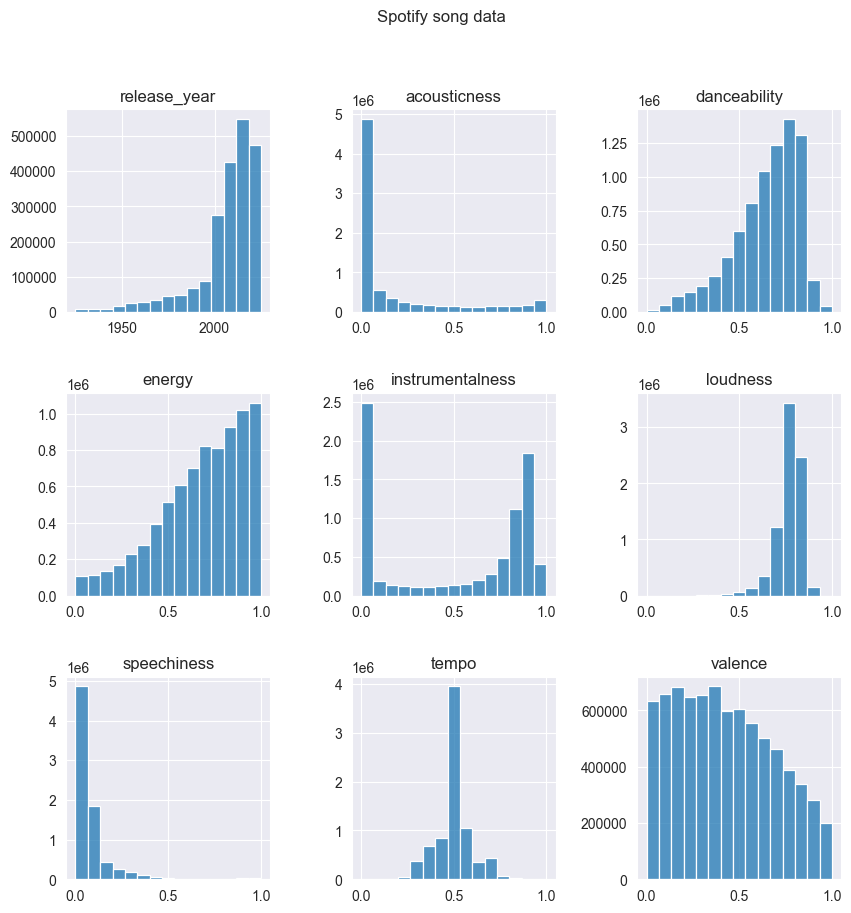

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

columns = [
    'release_year',
    'acousticness',
    'danceability',
    'energy',
    'instrumentalness',
    'loudness',
    'speechiness',
    'tempo',
    'valence',
]

x_ranges = [
    [1925, 2025],
    [0, 1],
    [0, 1],
    [0, 1],
    [0, 1],
    [],
    [0, 1],
    [],
    [0, 1],
]

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for i, column in enumerate(columns):
    ax = axes[i // 3, i % 3]

    data = df[column]
    x_range = x_ranges[i]
    
    data_range = None
    if len(x_range) == 2:
        data_range = [x_range[0], x_range[1]]

    sns.histplot(data, bins=15, ax=ax, binrange=data_range)
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.suptitle('Spotify song data')

plt.show()